In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Text(0.5, 1.0, 'Image with cvtcolor')

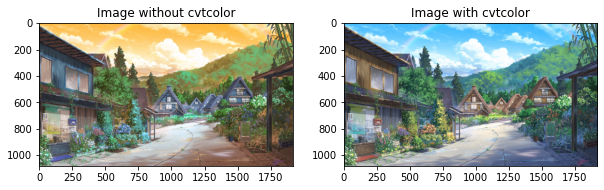

In [2]:
img=cv2.imread('nature.jpg')
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img)
ax[1].imshow(img_cvt)
ax[0].set_title("Image without cvtcolor")
ax[1].set_title("Image with cvtcolor")

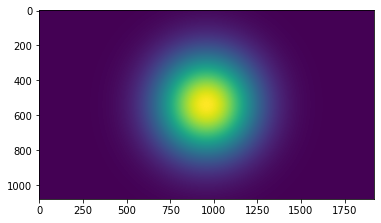

In [3]:
#  creating a viginette effect on an image
rows,cols=img.shape[:2]
# Since rows!=cols and hence to apply a gaussian kernel to it we need a rectangular kernel
gaussian_x=cv2.getGaussianKernel(cols,200)
gaussian_y=cv2.getGaussianKernel(rows,200)
kernel=gaussian_y*(gaussian_x.T)
kernel=kernel/np.linalg.norm(kernel)
# Kernel.shape=(1080,1920) which is the same as the image shape and hence we can apply the kernel to our image
plt.imshow(kernel)

In [ ]:
rows,cols=img.shape[:2]
def changeradius(value):
    global radius
    radius=value
def changevalue(scope):
    global value
    value=scope
# Now we define two parameters value--> for changing the focus of the image and radius--> for changing the radius of the image 

value=2
radius=130
mask=np.zeros((int(rows*(1+0.1*value)),int(cols*(1+0.1*value))))
cv2.namedWindow('Trackbar')
cv2.createTrackbar('Radius','Trackbar',120,500,changeradius)
cv2.createTrackbar('Value','Trackbar',1,10,changevalue)

while(True):
    gaussian_x=cv2.getGaussianKernel(int(cols*(1+0.1*value)),radius)
    gaussian_y=cv2.getGaussianKernel(int(rows*(1+0.1*value)),radius)
    kernel=gaussian_y*gaussian_x.T
    kernel=kernel/np.linalg.norm(kernel)
    mask=255*kernel
    mask_imposed=mask[int(rows*0.1*value):,int(cols*0.1*value):]
    output=np.copy(img)
    for i in range(3):
        output[:,:,i]=output[:,:,i]*mask_imposed
    cv2.imshow('Original',img)    
    cv2.imshow('Viginette',output)    
    k=cv2.waitKey(50)
    if k==ord('q'):
        break
